In [1]:
import numpy as np
import pandas as pd
import os

# A Movie Recommender System using K-Means Clustering

## Imports and Get the Dataset

I am using the Movie Lens dataset for this. There are two data files included in the dataset:  

- Movies
- Ratings

Both of the datasets are imported in two separate dataframes

In [21]:
import pandas as pd
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import numpy as np

In [22]:
#Import movies
movies = pd.read_csv('../input/movies.csv')

# Import Ratings
ratings = pd.read_csv('../input/ratings.csv')

Lets preview the dataframes

In [23]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [24]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Data Analysis
Lets analyze the data first to understand what we are working with. 

To Start the analysis, lets first take a subset of users and check their likings

### 2 Genre Analysis
We pick two Genres from the movie list and filter the dataset to get average ratings for those two Genre. Lets pick Horror and Thriller

In [25]:
ratings_twogenre = get_genre_ratings(ratings, movies, ['Horror', 'Thriller'], ['avg_horror_rating', 'avg_thriller_rating'])
ratings_twogenre.head()

,avg_horror_rating,avg_thriller_rating
1,3.47,4.15
2,3.00,3.70
3,4.69,4.14
4,4.25,3.55
5,3.00,3.56


Now that we have a filtered dataframe showing average ratings for the two Genres, lets refine the data a bit more to keep only users who liked one of the Genre more than other.

In [26]:
refined_dataset_twogenre = bias_genre_rating_dataset(ratings_twogenre, 3.5, 2.5)
refined_dataset_twogenre.head()

,index,avg_horror_rating,avg_thriller_rating
0,2,3.00,3.70
1,5,3.00,3.56
2,6,3.26,3.54
3,7,4.00,3.43
4,9,1.80,2.55


Lets draw a scatter plot to understand the data distribution for each of the users

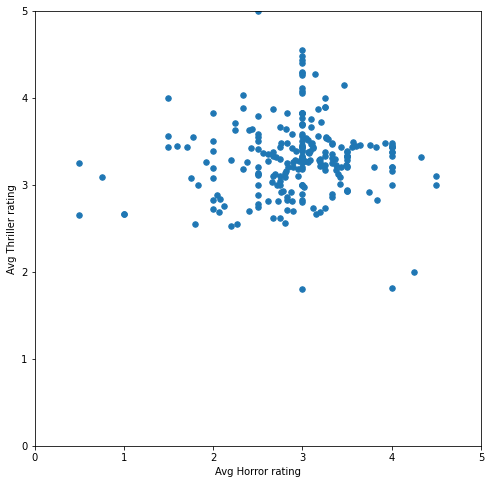

In [27]:
draw_scatterplot(refined_dataset_twogenre['avg_horror_rating'],'Avg Horror rating', refined_dataset_twogenre['avg_thriller_rating'], 'Avg Thriller rating')

Based on the data view above, we can see clear boundaries between user's ratings. Lets try to get clusters from this data using K-Means

In [28]:
X = refined_dataset_twogenre[['avg_horror_rating','avg_thriller_rating']].values
from sklearn.cluster import KMeans
kmeans_two_genre = KMeans(n_clusters=2, random_state=0)
predictions1 = kmeans_two_genre.fit_predict(X)

Lets plot the clusters to have a better view

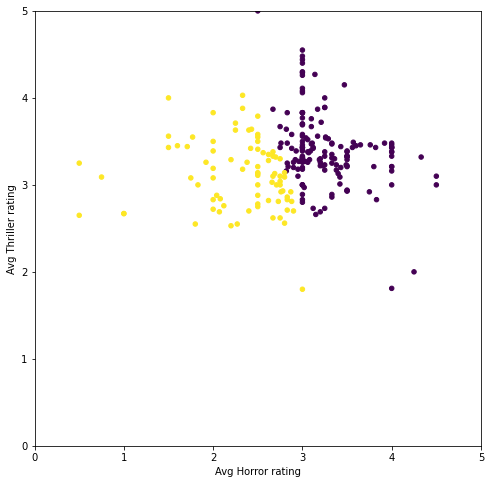

In [29]:
draw_clusters(refined_dataset_twogenre, predictions1)

So here we can see the data being divided into thwo groups/clusters:  

- Users liking Horror
- Users liking Thriller

Lets try to break the data into one more cluster

In [30]:
kmeans_two_genre1 = KMeans(n_clusters=3, random_state=1)
predictions2 = kmeans_two_genre1.fit_predict(X)

Lets see how it looks now

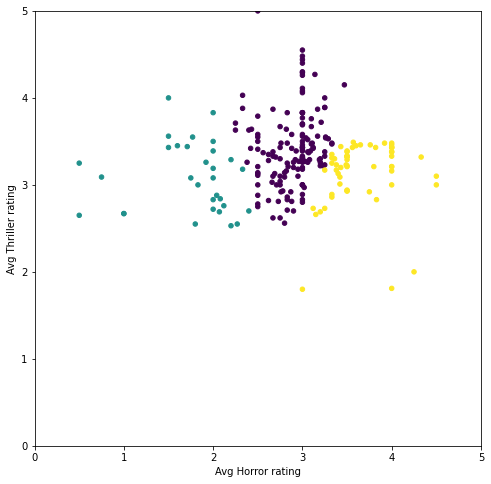

In [31]:
draw_clusters(refined_dataset_twogenre, predictions2)

Now we see one more group added. So with the new clustering we have:  

- Users who like Horror but not Thriller
- Users who like Thriller but not Horrror
- Users who like both

Lets add one more cluster and see the effect

In [32]:
kmeans_two_genre2 = KMeans(n_clusters=4, random_state=1)
predictions3 = kmeans_two_genre2.fit_predict(X)

So how does it look now

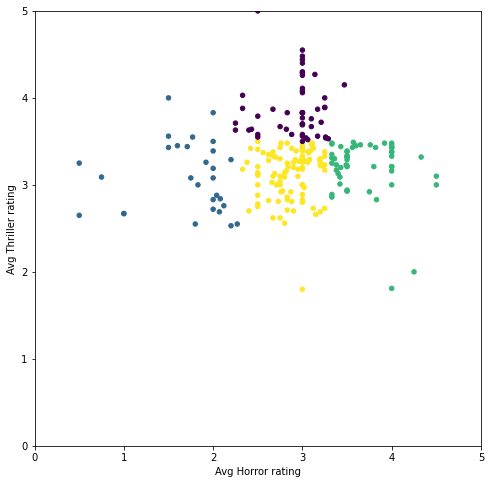

In [33]:
draw_clusters(refined_dataset_twogenre, predictions3)

So we can keep on adding clusters and refining the data groups from our dataset. The clusters accurately divide the users based on their likings(from ratings). But whats the optimum value for K or number of clusters. Lets figure that out

### Select K or number of clusters

To get the correct value for K(# of clusters), lets perform the above steps for a range of K values and plot the errors for each. We will use the Elbow Method to choose the K value. 

In [34]:
list_of_k = range(2, len(X)+1, 5)

# Calculate error values for all above
errors_list = [clustering_errors(k, X) for k in list_of_k]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:35: ConvergenceWarning: Number of distinct clusters (220) found smaller than n_clusters (222). Possibly due to duplicate points in X.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:35: ConvergenceWarning: Number of distinct clusters (220) found smaller than n_clusters (227). Possibly due to duplicate points in X.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:35: ConvergenceWarning: Number of distinct clusters (220) found smaller than n_clusters (232). Possibly due to duplicate points in X.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:35: ConvergenceWarning: Number of distinct clusters (220) found smaller than n_clusters (237). Possibly due to duplicate points in X.


Now lets plot the errors to have a visual. The optimum K value will be where the score (Y axis) have seemingly higher values.

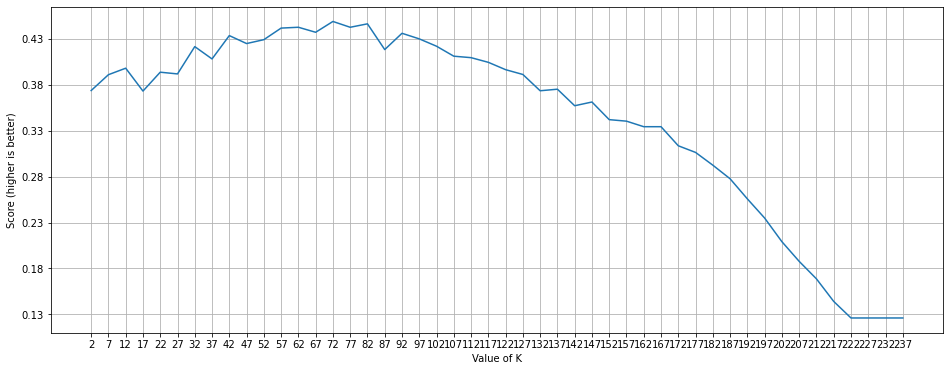

In [35]:
# Plot the each value of K vs. the silhouette score at that value
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_xlabel('Value of K')
ax.set_ylabel('Score (higher is better)')
ax.plot(list_of_k, errors_list)

# Ticks and grid
xticks = np.arange(min(list_of_k), max(list_of_k)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_list), 2), max(errors_list), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

From the graph we can see possible K values can be 12,32,57 amongst other values. After these the score really dips a lot and we wont be going further down. 

Lets pick K as 12 and perform the predictions.

In [36]:
kmeans_two_genre3 = KMeans(n_clusters=12, random_state=6)

# TODO: use fit_predict to cluster the dataset
predictions4 = kmeans_two_genre3.fit_predict(X)



Lets see how it looks now

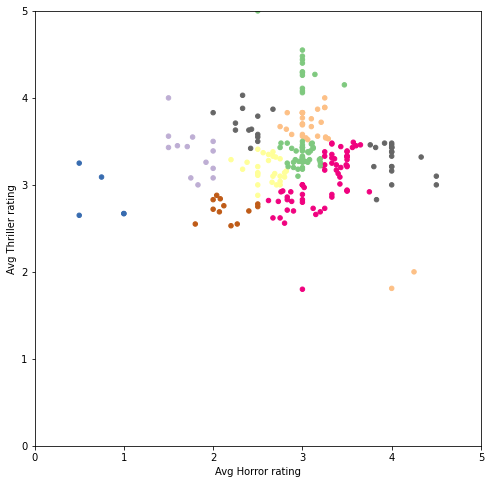

In [37]:
draw_clusters(refined_dataset_twogenre, predictions4, cmap='Accent')

### Lets add one more Genre

Lets add Fantasy as another genre and perform the similar analysis as above.

In [38]:
refined_dataset_3genre = get_genre_ratings(ratings, movies, 
                                                     ['Horror', 'Thriller', 'Fantasy'], 
                                                     ['avg_horror_rating', 'avg_thriller_rating', 'avg_fantasy_rating'])
refined_dataset_3genre = bias_genre_rating_dataset(refined_dataset_3genre, 3.5, 2.5).dropna()
refined_dataset_3genre.head()

,index,avg_horror_rating,avg_thriller_rating,avg_fantasy_rating
1,5,3.00,3.56,4.14
2,6,3.26,3.54,3.54
3,7,4.00,3.43,3.07
4,9,1.80,2.55,5.00
5,10,1.75,3.08,3.44


In [39]:
X_fantasy = refined_dataset_3genre[['avg_horror_rating', 'avg_thriller_rating', 'avg_fantasy_rating']].values

With the new dataset, lets do a prediction using 12 clusters.

In [40]:
kmeans_three_genre1 = KMeans(n_clusters=12)
predictions_1_1 = kmeans_three_genre1.fit_predict(X_fantasy)

Lets see how this looks now with 3 genres.

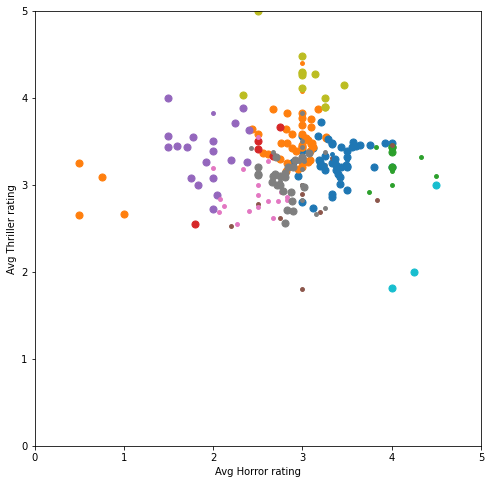

In [41]:
draw_clusters_3d(refined_dataset_3genre, predictions_1_1)

Now we can see how the clusters have changed. As the data input increases, the clusters become more refined. We wont add any more genres for now.

## Cluster the Movies

Now that we have seen how we can cluster based on Genres, lets change our approach and build the clusters based on user ratings on the movies.

### Prepare the dataset
First we transform the input data so that its easier to view/analyze the ratings across users and moview. We will build a pivot table showing users and their ratings for each movie.

In [42]:
titles_df = pd.merge(ratings, movies[['movieId', 'title']], on='movieId' )
ratings_users = pd.pivot_table(titles_df, index='userId', columns= 'title', values='rating')
ratings_users.iloc[:5]

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that majority of the ratings are NA and understandable because not all users have rated all movies. So lets sort the data to have the most rated ones first.

In [43]:
# shrinking the dataset for better visualization
num_movies = 30
num_users = 18
most_rated_sorted = sort_by_rating_density(ratings_users, num_movies, num_users)
most_rated_sorted.head()

title,Forrest Gump (1994),"Shawshank Redemption, The (1994)",Pulp Fiction (1994),"Silence of the Lambs, The (1991)","Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),Braveheart (1995),Terminator 2: Judgment Day (1991),Schindler's List (1993),...,Star Wars: Episode VI - Return of the Jedi (1983),"Godfather, The (1972)","Fugitive, The (1993)",Batman (1989),Saving Private Ryan (1998),"Lord of the Rings: The Two Towers, The (2002)","Lord of the Rings: The Return of the King, The (2003)",Aladdin (1992),Fargo (1996),"Sixth Sense, The (1999)"
413,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,...,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,3.0
589,5.0,4.5,4.5,3.5,4.0,5.0,4.0,4.0,4.5,5.0,...,4.5,5.0,4.0,3.5,4.0,5.0,4.5,4.0,4.0,3.5
473,3.0,5.0,4.0,4.5,4.5,4.0,4.5,3.0,4.0,5.0,...,4.0,5.0,5.0,4.0,3.0,5.0,5.0,4.0,4.0,5.0
479,5.0,5.0,4.0,4.5,5.0,4.5,5.0,5.0,4.5,5.0,...,3.5,5.0,3.5,4.5,4.5,4.5,4.0,4.0,4.0,4.0
67,3.5,3.0,2.0,3.5,4.5,5.0,3.5,2.5,3.5,4.0,...,5.0,4.0,4.5,4.0,4.0,4.0,4.5,3.5,2.5,2.5


Now we have a good ratings view. Still some NA but we can manage. Lets visualize this on a heatmap to identify the rating clusters.

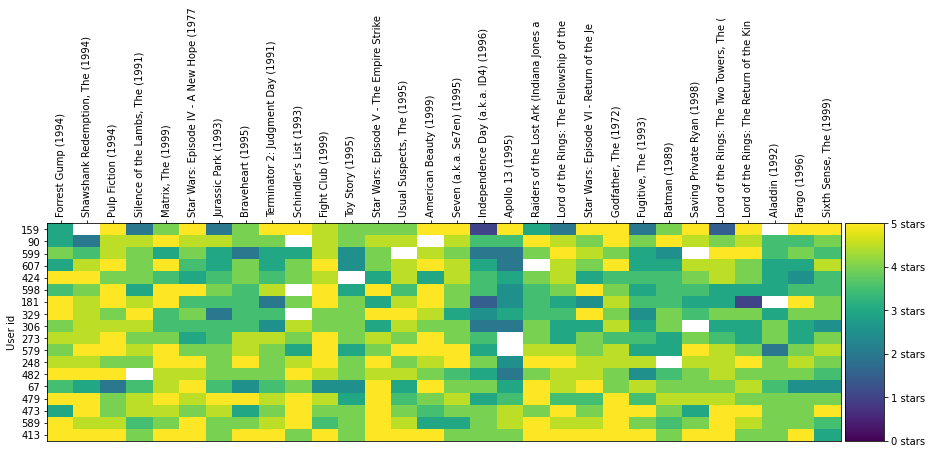

In [44]:
draw_movies_heatmap(most_rated_sorted)

This shows a visual of how users rated the movies. The white cells are when users didnt rate that movie. We handle this next.

For next steps, to have proper performance for this post, let me filter the dataset and work with a smaller dataset. In the actual API which I will be deploying for the Recomender app, I will be using the dataset.

In [45]:
ratings_df_subset =  pd.pivot_table(titles_df, index='userId', columns= 'title', values='rating')
filtered_most_rated = get_most_rated_movies(ratings_df_subset, 2000)

### Get the Sparse matrix

But the problem still remains where there are NA values in the dataset. To get around this, I will convert the dataset to sparse csr matrix.

In [46]:
# Remove all nulls
tmpmovies=filtered_most_rated.copy()
tmpmovies=tmpmovies.fillna(0)
dtcols=filtered_most_rated.columns
tmpdict={}
for v in dtcols:
    tmpdict[v]=pd.arrays.SparseArray(tmpmovies[v])
sparseFrame=pd.DataFrame(tmpdict)
sparse_ratings = csr_matrix(sparseFrame)

Now that we have the Sparse matrix for the ratings, lets perform some predictions.

### Perform Predictions

We will identify clusters based on the above ratings sparse frame and use K value as 

In [47]:
new_k_values = range(2, 100+1, 5)
sparse_errors_k = [clustering_errors(k, sparse_ratings) for k in new_k_values]

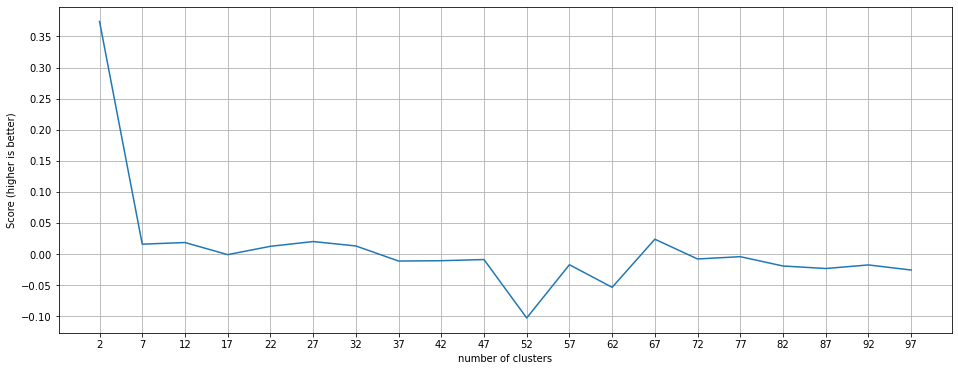

In [48]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_xlabel('number of clusters')
ax.set_ylabel('Score (higher is better)')
ax.plot(new_k_values, sparse_errors_k)


xticks = np.arange(min(new_k_values), max(new_k_values)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(sparse_errors_k), 2), max(sparse_errors_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

I know its a bit undecisive from above regarding which value to take for K. Lets select one of 2,7,12,17. 

Lets take k as 12

In [49]:
predictions_sparse_1 = KMeans(n_clusters=12, algorithm='full').fit_predict(sparse_ratings)

Lets visualize some of the clusters from above.

In [50]:

predict_cluster = pd.concat([filtered_most_rated.reset_index(), pd.DataFrame({'group':predictions_sparse_1})], axis=1)
predict_cluster.head()

,index,Forrest Gump (1994),"Shawshank Redemption, The (1994)",Pulp Fiction (1994),"Silence of the Lambs, The (1991)","Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),Braveheart (1995),Terminator 2: Judgment Day (1991),...,Rush (2013),Badlands (1973),Thinner (1996),Nine to Five (a.k.a. 9 to 5) (1980),Horrible Bosses 2 (2014),"Fall, The (2006)",Saturday Night Fever (1977),Hedwig and the Angry Inch (2000),All Dogs Go to Heaven 2 (1996),group
0,0,4.0,NaN,3.0,4.0,5.0,5.0,4.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,3,NaN,NaN,1.0,5.0,1.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,NaN,3.0,5.0,NaN,NaN,NaN,NaN,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


The group column shows which cluster group the user belongs to based on the ratings. Now that we have the clustered dataset, lets see what type of predictions we can perform for this.

### Predictions from the cluster

Lets pick a cluster group to analyze

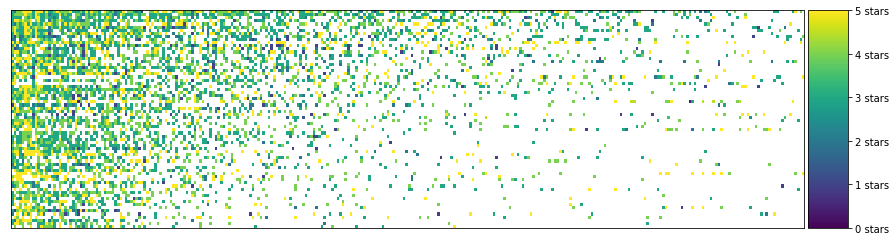

In [60]:
cluster_id = 5
newnum_users = 70
newnum_movies = 300
cluster_1 = predict_cluster[predict_cluster.group == cluster_id].drop(['index', 'group'], axis=1)
cluster_1 = sort_by_rating_density(cluster_1, newnum_movies, newnum_users)
draw_movies_heatmap(cluster_1, axis_labels=False)

This how the ratings table looks for the cluster

In [61]:
cluster_1.fillna('').head()

,Batman (1989),Pulp Fiction (1994),Apollo 13 (1995),True Lies (1994),Dances with Wolves (1990),Braveheart (1995),"Fugitive, The (1993)",Forrest Gump (1994),Batman Forever (1995),"Shawshank Redemption, The (1994)",...,"Perfect World, A (1993)","Cable Guy, The (1996)","City of Lost Children, The (Cité des enfants perdus, La) (1995)",Mulholland Falls (1996),Space Jam (1996),"Crow: City of Angels, The (1996)","Ghost and the Darkness, The (1996)",Spy Hard (1996),All Dogs Go to Heaven 2 (1996),Groundhog Day (1993)
1,3,2,4,4,5,5,5,5,3,5,...,,,,,,3,5,,4,
23,3,4,4,4,4,5,4,4,3,5,...,,,,,,,,,,
83,3,3,3,3,,4,3,4,3,5,...,,,,,,,,,,
62,3,5,5,4,5,4,4,5,,4,...,,,,,,,,,,
43,3,2,4,3,4,5,3,5,3,3,...,,,,,5,,,,,


The blank cells are because users didnt rate that specific movie. We can use the ratings from other users in the same cluster and get an average to get the specific rating for a blank cell. Let me demonstrate. First let me pick a movie

In [62]:
picked_movie='Braveheart (1995)'

For all other users, where the cell is blank for this movie in this cluster, the predicted rating will be

In [63]:
cluster_1[picked_movie].mean()

4.339285714285714

## Recommend Movies

Now that we have identified the clusters for users based on similar ratings they provided for the movies, we can use the cluster info to recommend movies to other users belonging to same cluster. If we see the mean score of ratings for some movies in a specific cluster, we will know the specific taste for that cluster

In [64]:
cluster_1.mean().head(10)

Batman (1989)                       3.308333
Pulp Fiction (1994)                 3.931034
Apollo 13 (1995)                    3.929825
True Lies (1994)                    3.584746
Dances with Wolves (1990)           3.870370
Braveheart (1995)                   4.339286
Fugitive, The (1993)                4.189655
Forrest Gump (1994)                 4.372727
Batman Forever (1995)               3.120000
Shawshank Redemption, The (1994)    4.415094
dtype: float64

Now we can recommend movies to a specific user in a specific cluster. The method of recommending the moview will be:  

- Get a specific user from a cluster
- Get a list of all movies the user did not rate
- From the cluster data which we identified above, identify the mean ratings for all these unrated movies, from the specific cluster user is in
- Sort by highest ratings first and provide the list to user as recommended watch

Lets see how it works

In [66]:
cluster_1.fillna('').head()

,Batman (1989),Pulp Fiction (1994),Apollo 13 (1995),True Lies (1994),Dances with Wolves (1990),Braveheart (1995),"Fugitive, The (1993)",Forrest Gump (1994),Batman Forever (1995),"Shawshank Redemption, The (1994)",...,"Perfect World, A (1993)","Cable Guy, The (1996)","City of Lost Children, The (Cité des enfants perdus, La) (1995)",Mulholland Falls (1996),Space Jam (1996),"Crow: City of Angels, The (1996)","Ghost and the Darkness, The (1996)",Spy Hard (1996),All Dogs Go to Heaven 2 (1996),Groundhog Day (1993)
1,3,2,4,4,5,5,5,5,3,5,...,,,,,,3,5,,4,
23,3,4,4,4,4,5,4,4,3,5,...,,,,,,,,,,
83,3,3,3,3,,4,3,4,3,5,...,,,,,,,,,,
62,3,5,5,4,5,4,4,5,,4,...,,,,,,,,,,
43,3,2,4,3,4,5,3,5,3,3,...,,,,,5,,,,,


Lets pick user id: 83 and recommend movies to the user

In [67]:
user_id = 83
sel_user_ratings  = cluster_1.loc[user_id, :]
all_unrated =  sel_user_ratings[sel_user_ratings.isnull()]
mean_ratings = pd.concat([all_unrated, cluster_1.mean()], axis=1, join='inner').loc[:,0]

## These are the movies which will be recommended to the user based on this algorithm

In [68]:
mean_ratings.sort_values(ascending=False)[:5]

Three Colors: Blue (Trois couleurs: Bleu) (1993)          5.000000
Wallace & Gromit: The Best of Aardman Animation (1996)    5.000000
Saving Private Ryan (1998)                                4.750000
Kids (1995)                                               4.750000
Three Colors: White (Trzy kolory: Bialy) (1994)           4.666667
Name: 0, dtype: float64